In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
real_names = {"tweets_c_500" : "Tweets #Clusters = 500", "tweets_c_50" : "Tweets #Clusters = 50", 
              "tweets_c_100" : "Tweets #Clusters = 100", "tweets_c_250" : "Tweets #Clusters = 250", 
              "tweets_10000" : "Tweets, 10000 entries", "tweets_20000" : "Tweets, 20000 entries", 
              "tweets_10000_c_62" : "Tweets, 10000 entries", "tweets_2500_c_16" : "Tweets, 2500 entries", 
              "tweets_5000_c_31" : "Tweets, 5000 entries", "tweets_20000_c_125" : "Tweets, 20000 entries",
            }

vary_n = [2, 4, 8, 32, 64, 128, 256]
for n in vary_n:
    real_names[f"tweets_c_250_"+str(n)] = f"Table #Cluster 250, Limit {n}"
    real_names[f"tweets_"+str(n)] = f"Table (Without Index) #Cluster 250, Limit {n}"

In [3]:
def plot_speedup(dir, comparisons, name="result", time_file="ALL_TIMINGS.csv"):
    df = pd.read_csv(f"{dir}/{time_file}", header=None)
    print(df)
    speedups = []
    for table in comparisons:
        base = int(df[df[0]==comparisons[table]][1].iloc[0])
        comp = int(df[df[0]==table][1].iloc[0])
        speedups.append({'table': real_names[table], 'speedup' : base/comp})

    result = pd.DataFrame(speedups)

    ax = result.plot(kind='bar', x='table', y='speedup', legend=False, color='none', edgecolor='black')
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())) + "x", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(p.get_x(), 5), textcoords='offset points')
    plt.title(name)
    plt.xlabel('Table')
    plt.ylabel('Speedup')
    plt.savefig(f'{dir}/speedup.png')
    plt.show()
            

              0     1
0        tweets  7766
1   tweets_c_50    33
2  tweets_c_100    29
3  tweets_c_250    11
4  tweets_c_500    11


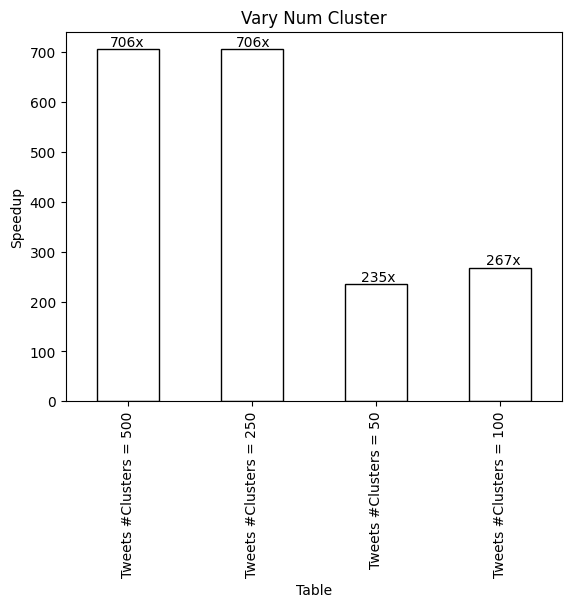

In [14]:
plot_speedup("/Users/manyab/AILIKE/go-db/godb/benchmark_results/var_num_cluster", 
             {"tweets_c_500" : "tweets",
              "tweets_c_250" : "tweets",
              "tweets_c_50" : "tweets",
              "tweets_c_100" : "tweets",}, 
               name = "Vary Num Cluster",)

In [6]:
def plot_accuracy(dir, comparisons, name="result"):
    
    percentages = []
    for table in comparisons: 
        baseline_file = f"{dir}/{comparisons[table]}.csv"
        table_file = f"{dir}/{table}.csv"
    
        with open(f"{dir}/{comparisons[table]}.csv", 'r') as file:
            base_lines_data = file.readlines()
        with open(f"{dir}/{table}.csv", 'r') as file:
            table_file = file.readlines()
    
        intersection = set(base_lines_data) & set(table_file)
        percentage = (len(intersection) / min(len(base_lines_data), len(table_file))) * 100
        percentages.append({'table': real_names[table], 'overlap' : percentage})

    result = pd.DataFrame(percentages)
    ax = result.plot(kind='bar', x='table', y='overlap', legend=False, color='none', edgecolor='black')
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())) + "%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(p.get_x(), 5), textcoords='offset points')
    plt.title(name)
    plt.xlabel('Table')
    plt.ylabel('Accuracy (%)')
    plt.savefig(f'{dir}/accuracy.png')
    plt.show()

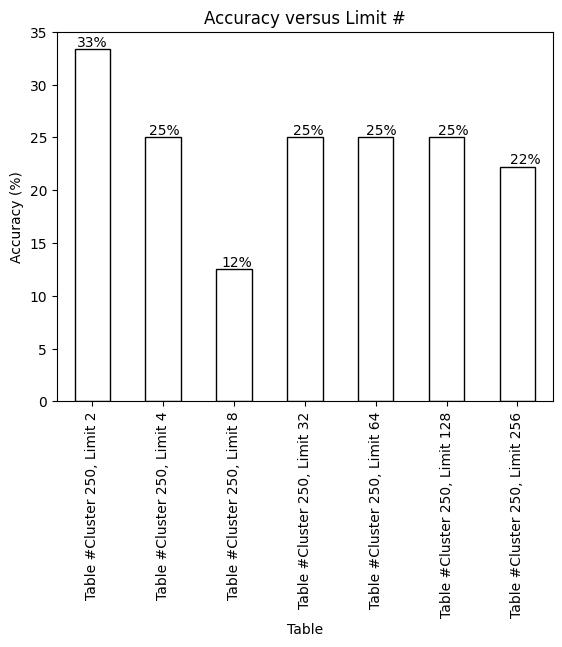

In [7]:
comps = {}
for num in [2, 4, 8, 32, 64, 128, 256]:
    comps[f"tweets_c_250_"+str(num)] = f"tweets_"+str(num)

plot_accuracy("/Users/manyab/AILIKE/go-db/godb/benchmark_results/var_n", 
               comps,
               name = "Accuracy versus Limit #",)

                   0     1
0           tweets_2  7683
1           tweets_4  7835
2           tweets_8  7567
3          tweets_32  7711
4          tweets_64  7591
5         tweets_128  7596
6         tweets_256  7667
7     tweets_c_250_2    11
8     tweets_c_250_4     9
9     tweets_c_250_8     9
10   tweets_c_250_32     9
11   tweets_c_250_64     9
12  tweets_c_250_128     9
13  tweets_c_250_256    12


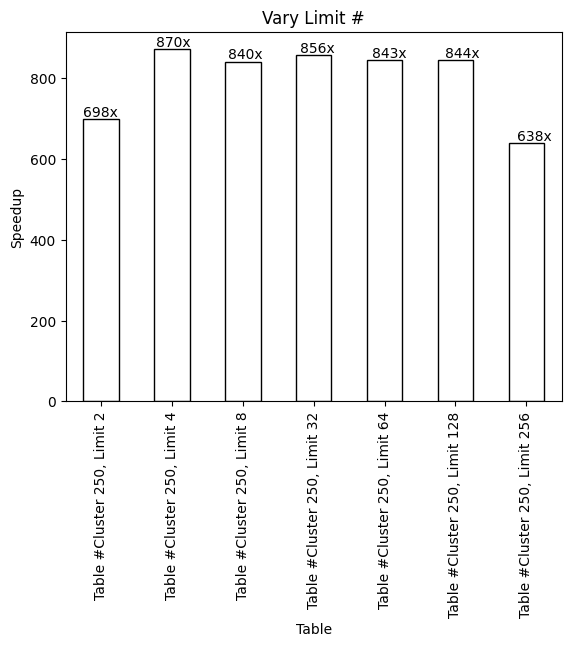

In [8]:
comps = {}
for num in [2, 4, 8, 32, 64, 128, 256]:
    comps[f"tweets_c_250_"+str(num)] = f"tweets_"+str(num)

plot_speedup("/Users/manyab/AILIKE/go-db/godb/benchmark_results/var_n", 
               comps,
               name = "Vary Limit #",)

                    0     1
0              tweets  7650
1         tweets_2500   451
2         tweets_5000   927
3        tweets_10000  1897
4        tweets_20000  3797
5        tweets_c_250    16
6    tweets_2500_c_16    37
7    tweets_5000_c_31    48
8   tweets_10000_c_62    12
9  tweets_20000_c_125     9


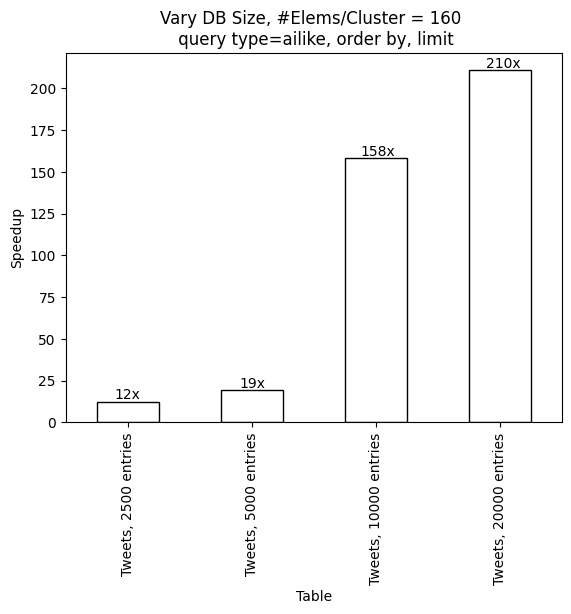

In [9]:
plot_speedup("/Users/manyab/AILIKE/go-db/godb/benchmark_results/var_db_size", 
             {"tweets_2500_c_16" : "tweets_2500",
              "tweets_5000_c_31" : "tweets_5000",
              "tweets_10000_c_62" : "tweets_10000",
              "tweets_20000_c_125" : "tweets_10000",}, 
               name = "Vary DB Size, #Elems/Cluster = 160 \n query type=ailike, order by, limit",)

                    0     1
0              tweets  4648
1         tweets_2500   263
2         tweets_5000   552
3        tweets_10000  1147
4        tweets_20000  2321
5        tweets_c_250    38
6    tweets_2500_c_16     4
7    tweets_5000_c_31     4
8   tweets_10000_c_62     3
9  tweets_20000_c_125     6


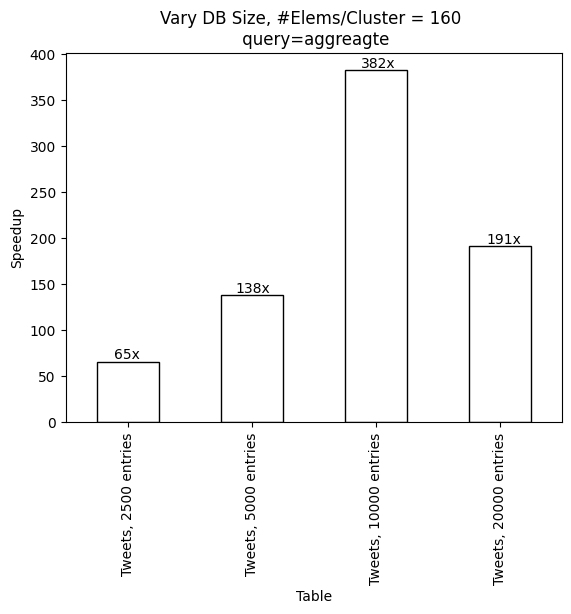

In [10]:
plot_speedup("/Users/manyab/AILIKE/go-db/godb/benchmark_results/var_agg_query", 
             {"tweets_2500_c_16" : "tweets_2500",
              "tweets_5000_c_31" : "tweets_5000",
              "tweets_10000_c_62" : "tweets_10000",
              "tweets_20000_c_125" : "tweets_10000",}, 
               name = "Vary DB Size, #Elems/Cluster = 160 \n query=aggreagte")

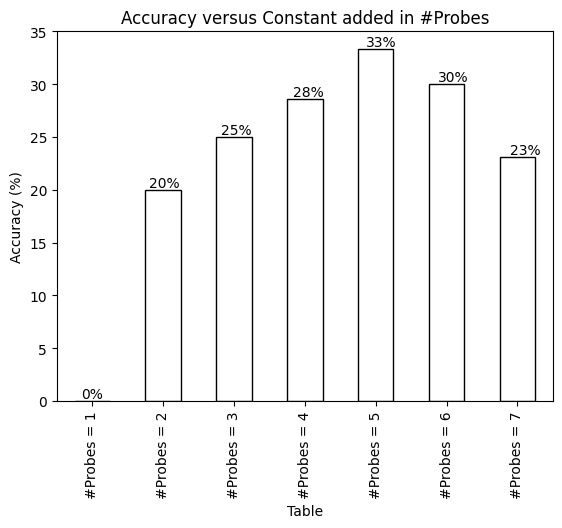

In [15]:

# Run after other wise it will be conflict with limit
vary_probes = [i for i in range(1, 8)]
for n in vary_probes:
    real_names[f"tweets_c_250_"+str(n)] = f"#Probes = {n}"
    real_names[f"tweets_"+str(n)] = f"Table (Without Index) #Probes = {n}"

comps = {}
for num in vary_probes:
    comps[f"tweets_c_250_"+str(num)] = f"tweets_"+str(num)

plot_accuracy("./var_probe", 
               comps,
               name = "Accuracy versus Constant added in #Probes",)